## SETTINGS

In [1]:
# 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import matplotlib.font_manager as fm
# 설치된 폰트 중 'NanumGothic' 찾기
for font in fm.fontManager.ttflist:
    if 'NanumGothic' in font.name:
        plt.rcParams['font.family'] = font.name
        break
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import numpy as np
import scipy.stats as stats

## 전국 인구 대비 희귀난치성 질환자 수 비교하기

### 해당 데이터 프레임 전처리

In [34]:
df_polulation = pd.read_csv("../csv/2012_2021_연령대별_전국인구.csv")

In [35]:
df_polulation = df_polulation.drop('항목',axis=1)
df_polulation = df_polulation.drop(index=0)
df_polulation = df_polulation.reset_index(drop=True)
df_polulation[:2]

,시점,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,2012,50948272,2321293,2347418,2955976,3491303,3319540,3307408,4062598,4106345,...,3386102,2428603,1899933,1774343,1196000,663632,301459,106586,25450,12657
1,2013,51141463,2301320,2322614,2809185,3420530,3405202,3184327,4086122,3929292,...,3621186,2486668,1985888,1803037,1269763,708188,323430,120230,26657,13793


In [36]:
df_polulation.iloc[:, 1:] = df_polulation.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_polulation[:2]

,시점,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,2012,50948272,2321293,2347418,2955976,3491303,3319540,3307408,4062598,4106345,...,3386102,2428603,1899933,1774343,1196000,663632,301459,106586,25450,12657
1,2013,51141463,2301320,2322614,2809185,3420530,3405202,3184327,4086122,3929292,...,3621186,2486668,1985888,1803037,1269763,708188,323430,120230,26657,13793


In [37]:
df_polulation['85세 이상'] = df_polulation[['85 - 89세', '90 - 94세', '95 - 99세', '100+']].sum(axis=1)
df_polulation.drop(['85 - 89세', '90 - 94세', '95 - 99세', '100+'], axis=1, inplace=True)
df_polulation[:2]

,시점,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,50948272,2321293,2347418,2955976,3491303,3319540,3307408,4062598,4106345,4639747,4196411,4405468,3386102,2428603,1899933,1774343,1196000,663632,446152
1,2013,51141463,2301320,2322614,2809185,3420530,3405202,3184327,4086122,3929292,4599684,4320277,4404070,3621186,2486668,1985888,1803037,1269763,708188,484110


In [50]:
df_polulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        10 non-null     object
 1   계         10 non-null     object
 2   0 - 4세    10 non-null     object
 3   5 - 9세    10 non-null     object
 4   10 - 14세  10 non-null     object
 5   15 - 19세  10 non-null     object
 6   20 - 24세  10 non-null     object
 7   25 - 29세  10 non-null     object
 8   30 - 34세  10 non-null     object
 9   35 - 39세  10 non-null     object
 10  40 - 44세  10 non-null     object
 11  45 - 49세  10 non-null     object
 12  50 - 54세  10 non-null     object
 13  55 - 59세  10 non-null     object
 14  60 - 64세  10 non-null     object
 15  65 - 69세  10 non-null     object
 16  70 - 74세  10 non-null     object
 17  75 - 79세  10 non-null     object
 18  80 - 84세  10 non-null     object
 19  85세 이상    10 non-null     object
dtypes: object(20)
memory usage: 1.7+ KB


In [43]:
df_rare_disease = pd.read_csv("../csv/2012_2021_연령별_희귀난치성질환자수.csv")

In [44]:
df_rare_disease = df_rare_disease.drop(['성별(1)','질병별(1)'],axis=1)
df_rare_disease = df_rare_disease.drop(index=0)
df_rare_disease = df_rare_disease.reset_index(drop=True)
df_rare_disease[:2]

,시점,계,0세,1 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,...,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,589455,3171,8170,6079,7018,12245,18561,24294,33380,...,46601,45800,57574,56597,50834,48340,55158,42903,23120,11183
1,2013,631417,3541,9789,6389,7246,12611,19615,24208,34704,...,48604,49386,60316,62318,54192,52819,58771,48464,26980,13352


In [45]:
df_rare_disease.iloc[:, 1:] = df_rare_disease.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_rare_disease[:2]

,시점,계,0세,1 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,...,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,589455,3171,8170,6079,7018,12245,18561,24294,33380,...,46601,45800,57574,56597,50834,48340,55158,42903,23120,11183
1,2013,631417,3541,9789,6389,7246,12611,19615,24208,34704,...,48604,49386,60316,62318,54192,52819,58771,48464,26980,13352


In [46]:
df_rare_disease['0 - 4세'] = df_rare_disease['0세'] + df_rare_disease['1 - 4세']
df_rare_disease.drop(['0세', '1 - 4세'], axis=1, inplace=True)
df_rare_disease[:2]

,시점,계,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상,0 - 4세
0,2012,589455,6079,7018,12245,18561,24294,33380,38427,46601,45800,57574,56597,50834,48340,55158,42903,23120,11183,11341
1,2013,631417,6389,7246,12611,19615,24208,34704,38112,48604,49386,60316,62318,54192,52819,58771,48464,26980,13352,13330


In [47]:
new_col = df_rare_disease['0 - 4세']
df_rare_disease.drop(['0 - 4세'], axis=1, inplace=True)
df_rare_disease.insert(2, '0 - 4세', new_col)
df_rare_disease[:2]

,시점,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,589455,11341,6079,7018,12245,18561,24294,33380,38427,46601,45800,57574,56597,50834,48340,55158,42903,23120,11183
1,2013,631417,13330,6389,7246,12611,19615,24208,34704,38112,48604,49386,60316,62318,54192,52819,58771,48464,26980,13352


In [49]:
df_rare_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        10 non-null     object
 1   계         10 non-null     object
 2   0 - 4세    10 non-null     object
 3   5 - 9세    10 non-null     object
 4   10 - 14세  10 non-null     object
 5   15 - 19세  10 non-null     object
 6   20 - 24세  10 non-null     object
 7   25 - 29세  10 non-null     object
 8   30 - 34세  10 non-null     object
 9   35 - 39세  10 non-null     object
 10  40 - 44세  10 non-null     object
 11  45 - 49세  10 non-null     object
 12  50 - 54세  10 non-null     object
 13  55 - 59세  10 non-null     object
 14  60 - 64세  10 non-null     object
 15  65 - 69세  10 non-null     object
 16  70 - 74세  10 non-null     object
 17  75 - 79세  10 non-null     object
 18  80 - 84세  10 non-null     object
 19  85세 이상    10 non-null     object
dtypes: object(20)
memory usage: 1.7+ KB


In [51]:
df_polulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        10 non-null     object
 1   계         10 non-null     object
 2   0 - 4세    10 non-null     object
 3   5 - 9세    10 non-null     object
 4   10 - 14세  10 non-null     object
 5   15 - 19세  10 non-null     object
 6   20 - 24세  10 non-null     object
 7   25 - 29세  10 non-null     object
 8   30 - 34세  10 non-null     object
 9   35 - 39세  10 non-null     object
 10  40 - 44세  10 non-null     object
 11  45 - 49세  10 non-null     object
 12  50 - 54세  10 non-null     object
 13  55 - 59세  10 non-null     object
 14  60 - 64세  10 non-null     object
 15  65 - 69세  10 non-null     object
 16  70 - 74세  10 non-null     object
 17  75 - 79세  10 non-null     object
 18  80 - 84세  10 non-null     object
 19  85세 이상    10 non-null     object
dtypes: object(20)
memory usage: 1.7+ KB


### 해당 데이터로 비율 비교

In [63]:
# 해당 연도 별 및 연령대 별 전국민 인구수 대비 희귀질환자의 비율
ratio_df = (df_rare_disease.iloc[:, 1:]/df_polulation.iloc[:, 1:]) * 100
ratio_df = ratio_df.astype(float)
# 소수점 2자리 이하 반올림
ratio_df = ratio_df.round(2)
ratio_df.insert(0, '연도별', df_polulation['시점'])
ratio_df

,연도별,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,1.16,0.49,0.26,0.24,0.35,0.56,0.73,0.82,0.94,1.00,1.09,1.31,1.67,2.09,2.54,3.11,3.59,3.48,2.51
1,2013,1.23,0.58,0.28,0.26,0.37,0.58,0.76,0.85,0.97,1.06,1.14,1.37,1.72,2.18,2.66,3.26,3.82,3.81,2.76
2,2014,1.33,0.70,0.32,0.29,0.40,0.61,0.80,0.88,1.00,1.12,1.20,1.42,1.80,2.27,2.79,3.42,4.06,4.12,3.08
3,2015,1.37,0.80,0.32,0.30,0.40,0.61,0.81,0.89,1.00,1.13,1.21,1.44,1.80,2.30,2.85,3.51,4.15,4.32,3.26
4,2016,1.44,0.95,0.38,0.35,0.44,0.63,0.82,0.91,1.00,1.14,1.24,1.46,1.81,2.33,2.96,3.61,4.27,4.51,3.40
5,2017,1.48,1.02,0.41,0.36,0.45,0.63,0.80,0.91,0.99,1.14,1.24,1.44,1.79,2.32,2.97,3.66,4.42,4.84,3.92
6,2018,1.61,1.04,0.45,0.38,0.48,0.66,0.83,0.94,1.04,1.18,1.30,1.50,1.86,2.39,3.10,3.88,4.87,5.64,5.13
7,2019,1.71,1.05,0.48,0.41,0.52,0.69,0.88,1.00,1.09,1.23,1.35,1.55,1.90,2.45,3.17,4.00,5.08,5.97,5.70
8,2020,1.68,0.73,0.49,0.41,0.54,0.71,0.92,1.05,1.12,1.24,1.39,1.57,1.91,2.43,3.14,3.93,4.70,5.00,3.96
9,2021,1.80,0.74,0.53,0.47,0.60,0.81,1.01,1.16,1.23,1.32,1.48,1.65,1.98,2.50,3.25,4.12,4.97,5.30,4.33


In [64]:
new_rate_df = pd.DataFrame(columns=ratio_df.columns)
new_rate_df['연도별'] = ratio_df['연도별']
# 증감률 계산: ratio_df의 각 열에 대해 이전 행과의 차이를 계산하여 백분율로 변환
for column in ratio_df.columns[1:]:  # '연도별' 열을 제외하고 반복
    new_rate_df[column] = (ratio_df[column] - ratio_df[column].shift(1)) / ratio_df[column].shift(1) * 100
# 증감률 반올림
new_rate_df = new_rate_df.round(2)
new_rate_df

,연도별,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,6.03,18.37,7.69,8.33,5.71,3.57,4.11,3.66,3.19,6.00,4.59,4.58,2.99,4.31,4.72,4.82,6.41,9.48,9.96
2,2014,8.13,20.69,14.29,11.54,8.11,5.17,5.26,3.53,3.09,5.66,5.26,3.65,4.65,4.13,4.89,4.91,6.28,8.14,11.59
3,2015,3.01,14.29,0.00,3.45,0.00,0.00,1.25,1.14,0.00,0.89,0.83,1.41,0.00,1.32,2.15,2.63,2.22,4.85,5.84
4,2016,5.11,18.75,18.75,16.67,10.00,3.28,1.23,2.25,0.00,0.88,2.48,1.39,0.56,1.30,3.86,2.85,2.89,4.40,4.29
5,2017,2.78,7.37,7.89,2.86,2.27,0.00,-2.44,0.00,-1.00,0.00,0.00,-1.37,-1.10,-0.43,0.34,1.39,3.51,7.32,15.29
6,2018,8.78,1.96,9.76,5.56,6.67,4.76,3.75,3.30,5.05,3.51,4.84,4.17,3.91,3.02,4.38,6.01,10.18,16.53,30.87
7,2019,6.21,0.96,6.67,7.89,8.33,4.55,6.02,6.38,4.81,4.24,3.85,3.33,2.15,2.51,2.26,3.09,4.31,5.85,11.11
8,2020,-1.75,-30.48,2.08,0.00,3.85,2.90,4.55,5.00,2.75,0.81,2.96,1.29,0.53,-0.82,-0.95,-1.75,-7.48,-16.25,-30.53
9,2021,7.14,1.37,8.16,14.63,11.11,14.08,9.78,10.48,9.82,6.45,6.47,5.10,3.66,2.88,3.50,4.83,5.74,6.00,9.34


In [65]:
age_avg = ratio_df.iloc[:, 1:].mean()

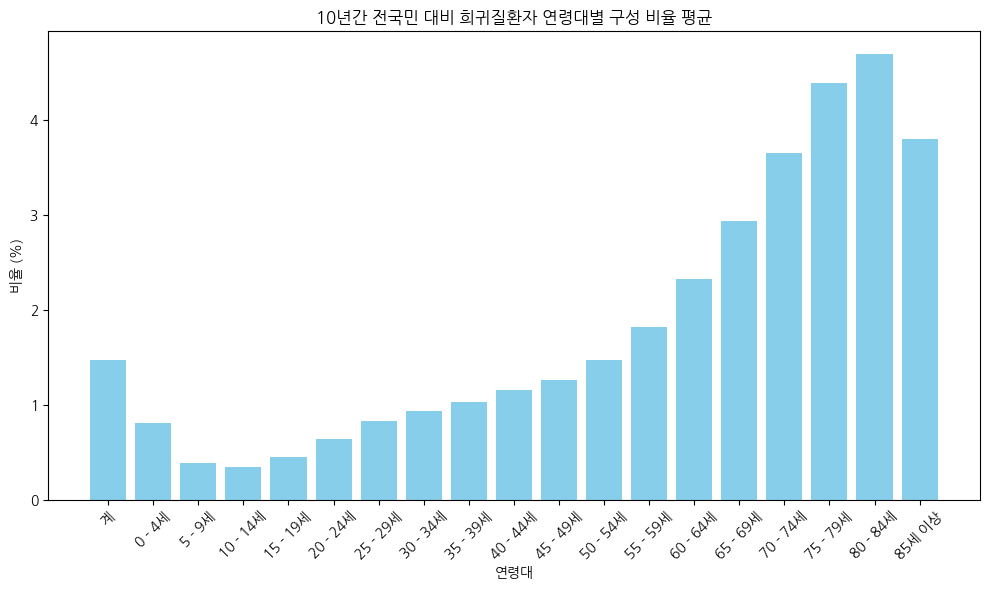

In [73]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(age_avg.index, age_avg.values, color='skyblue') 
plt.title('10년간 전국민 대비 희귀질환자 연령대별 구성 비율 평균')  # 그래프 제목
plt.xlabel('연령대')  # x축 라벨
plt.ylabel('비율 (%)')  # y축 라벨
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 표시

## 일반 진료비 대비 희귀질환 진료비 비교

In [78]:
df_total_cost = pd.read_csv("../csv/2012_2021_22대_분류별_진료현황_총진료비.csv")
df_total_cost.iloc[:, 2:] = df_total_cost.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_total_cost = df_total_cost.round(0)
df_total_cost

,질병22대분류별(1),진료형태별(1),2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,질병22대분류별(1),진료형태별(1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,계,계,46322753832.0,48708494214.0,52581305879.0,56358255846.0,62650434488.0,68109461292.0,75083107915.0,82990568999.0,83732461199.0,92308501084.0
2,계,입원,16535654429.0,17490104498.0,19055197713.0,20903730099.0,23479513202.0,25662987085.0,28510854274.0,31731665711.0,32443676672.0,34902328938.0
3,계,외래,29787099403.0,31218389716.0,33526108166.0,35454525747.0,39170921286.0,42446474207.0,46572253640.0,51258903287.0,51288784527.0,57406172147.0
4,특정감염성 및 기생충성 질환(A00-B99),계,1577658908.0,1567084421.0,1776206340.0,1908986043.0,2188649119.0,2277142512.0,2401196030.0,2569131257.0,2348260048.0,2487206932.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,특수목적코드(U00-U99),입원,7654405.0,4745268.0,5011131.0,6263841.0,3638812.0,1506129.0,856153.0,4736430.0,213884757.0,1038540672.0
66,특수목적코드(U00-U99),외래,3348985.0,2115892.0,2635556.0,3978237.0,2254161.0,1336462.0,1895905.0,1512934.0,5247754.0,90533458.0
67,기타,계,634649036.0,2664239899.0,297280361.0,283113749.0,292086712.0,737400243.0,799711707.0,341212038.0,191898263.0,175157697.0
68,기타,입원,11641211.0,2513654.0,19700622.0,5265141.0,5717974.0,6072911.0,6974790.0,7303747.0,6571751.0,7501170.0
